In [72]:
# Importing Libraries:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [74]:
# Reading Dataset:
dataset = pd.read_csv("Resources/Stoke_analysis1.csv")
# Top 5 records:
dataset.head()

,Unnamed: 0,pid,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,1,PID2829938,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,2,PID1833441,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,3,PID8745027,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,4,PID4568062,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,5,PID3855176,23,Male,0,-1,126,81,89,0,0,22,201,-1,0


In [75]:
# Dropping unneccsary feature :
dataset = dataset.drop('pid', axis=1)

In [76]:
# Shape of dataset:
dataset.shape

(4798, 14)

In [77]:
dataset.isnull().sum()

Unnamed: 0    0
age           0
gender        0
nhiss         0
mrs           0
systolic      0
distolic      0
glucose       0
paralysis     0
smoking       0
bmi           0
cholestrol    0
tos           0
risk          0
dtype: int64

In [78]:
# Description:
dataset.describe()

,Unnamed: 0,age,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
count,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000
mean,2399.500000,47.116090,18.124427,3.674239,153.091705,103.655065,225.846186,1.362026,0.884744,33.739475,217.531055,1.988745,1.879325
std,1385.207626,23.690637,11.274141,1.872073,24.927477,18.344127,56.119071,1.106405,0.903432,6.231687,20.268753,0.973207,0.486878
min,1.000000,1.000000,0.000000,-1.000000,100.000000,59.000000,70.000000,0.000000,0.000000,18.000000,160.000000,-1.000000,0.000000
25%,1200.250000,28.000000,10.000000,2.000000,132.000000,91.000000,203.000000,0.000000,0.000000,29.000000,205.000000,1.000000,2.000000
50%,2399.500000,49.000000,18.000000,4.000000,154.000000,104.000000,239.000000,1.000000,1.000000,34.000000,219.000000,2.000000,2.000000
75%,3598.750000,66.000000,25.000000,5.000000,175.000000,118.000000,268.000000,2.000000,2.000000,38.000000,234.000000,3.000000,2.000000
max,4798.000000,90.000000,45.000000,6.000000,195.000000,135.000000,295.000000,3.000000,3.000000,45.000000,253.000000,3.000000,3.000000


In [79]:
# Datatypes:
dataset.dtypes

Unnamed: 0     int64
age            int64
gender        object
nhiss          int64
mrs            int64
systolic       int64
distolic       int64
glucose        int64
paralysis      int64
smoking        int64
bmi            int64
cholestrol     int64
tos            int64
risk           int64
dtype: object

In [80]:
# Target feature:
print("People at Risk     : ", dataset['risk'].value_counts()[1])
print("People not at Risk : ", dataset['risk'].value_counts()[0])

People at Risk     :  632
People not at Risk :  87


In [81]:
dataset[dataset['gender']=='Other']

,Unnamed: 0,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk


In [82]:
# Gender
dataset['gender'].value_counts()

Male      3122
Female    1676
Name: gender, dtype: int64

In [83]:
# Gender:
print("Male    : ", dataset['gender'].value_counts()[1])
print("female  : ", dataset['gender'].value_counts()[0])

Male    :  1676
female  :  3122


In [84]:
# Hypertension:
print("Smokers     : ", dataset['smoking'].value_counts()[1])
print("Non-smokers : ", dataset['smoking'].value_counts()[0])

Smokers     :  1287
Non-smokers :  2110


In [124]:
# Good Glucose:
counter=0
for i in range(70,127):
    num=dataset["glucose"].value_counts()[i]
    counter += num


In [125]:
print("Good glucose:", counter)


Good glucose: 439


In [126]:
# High Glucose 
counter=0
for i in range(128,295):
    num=dataset["glucose"].value_counts()[i]
    counter += num

In [127]:
print("High glucose:", counter)

High glucose: 4291


In [129]:
# Good BMI:
counter=0
for i in range(18,25):
    num=dataset["bmi"].value_counts()[i]
    counter += num

In [130]:
print("Good BMI:", counter)

Good BMI: 223


In [133]:
# High BMI:
counter=0
for i in range(26,35):
    num=dataset["bmi"].value_counts()[i]
    counter += num

In [134]:
print("High BMI:", counter)

High BMI: 2138


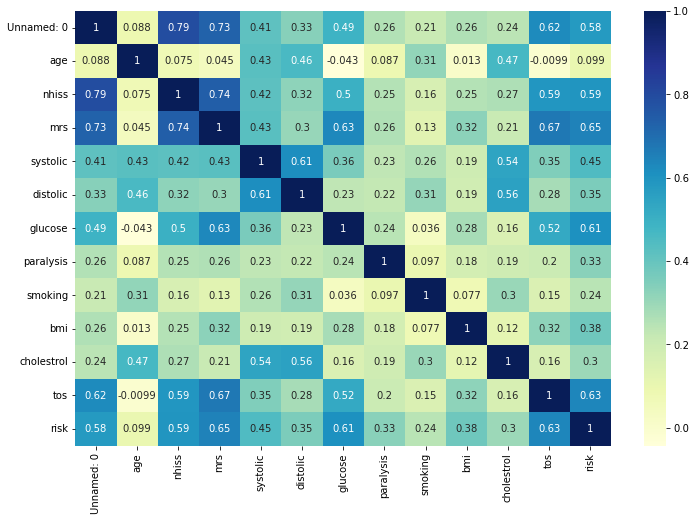

In [139]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [140]:
dataset.head()

,Unnamed: 0,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,1,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,2,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,3,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,4,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,5,23,Male,0,-1,126,81,89,0,0,22,201,-1,0


In [141]:
# Dependent & Independent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [142]:
X.head()

,Unnamed: 0,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos
0,1,61,Male,0,-1,124,80,77,0,0,22,200,-1
1,2,75,Male,0,-1,123,82,79,0,0,20,208,-1
2,3,73,Male,0,-1,121,83,83,0,0,20,208,-1
3,4,63,Female,0,-1,120,85,105,0,0,20,210,-1
4,5,23,Male,0,-1,126,81,89,0,0,22,201,-1


In [143]:
X = pd.get_dummies(X, drop_first=True)

In [144]:
X.head()

,Unnamed: 0,age,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,gender_Male
0,1,61,0,-1,124,80,77,0,0,22,200,-1,1
1,2,75,0,-1,123,82,79,0,0,20,208,-1,1
2,3,73,0,-1,121,83,83,0,0,20,208,-1,1
3,4,63,0,-1,120,85,105,0,0,20,210,-1,0
4,5,23,0,-1,126,81,89,0,0,22,201,-1,1


In [145]:
X.columns

Index(['Unnamed: 0', 'age', 'nhiss', 'mrs', 'systolic', 'distolic', 'glucose',
       'paralysis', 'smoking', 'bmi', 'cholestrol', 'tos', 'gender_Male'],
      dtype='object')

In [147]:
X = X[['Unnamed: 0', 'age', 'nhiss', 'mrs', 'systolic', 'distolic', 'glucose',
       'paralysis', 'smoking', 'bmi', 'cholestrol', 'tos', 'gender_Male']]

In [148]:
X.head()

,Unnamed: 0,age,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,gender_Male
0,1,61,0,-1,124,80,77,0,0,22,200,-1,1
1,2,75,0,-1,123,82,79,0,0,20,208,-1,1
2,3,73,0,-1,121,83,83,0,0,20,208,-1,1
3,4,63,0,-1,120,85,105,0,0,20,210,-1,0
4,5,23,0,-1,126,81,89,0,0,22,201,-1,1


In [149]:
# Train-Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [150]:
print(X_train.shape)
print(X_test.shape)

(3838, 13)
(960, 13)


In [151]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [152]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.95
[[ 19   0   0   0]
 [  0 116  25   0]
 [  0  18 734   2]
 [  0   0   3  43]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.87      0.82      0.84       141
           2       0.96      0.97      0.97       754
           3       0.96      0.93      0.95        46

    accuracy                           0.95       960
   macro avg       0.95      0.93      0.94       960
weighted avg       0.95      0.95      0.95       960



# An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [153]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8395833333333333
[[  0  19   0   0]
 [  0  94  47   0]
 [  0  22 684  48]
 [  0   0  18  28]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.70      0.67      0.68       141
           2       0.91      0.91      0.91       754
           3       0.37      0.61      0.46        46

    accuracy                           0.84       960
   macro avg       0.49      0.55      0.51       960
weighted avg       0.84      0.84      0.84       960



C:\Users\wesan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wesan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wesan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

In [154]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9552083333333333
[[ 17   2   0   0]
 [  0 121  20   0]
 [  0  11 739   4]
 [  0   0   6  40]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.90      0.86      0.88       141
           2       0.97      0.98      0.97       754
           3       0.91      0.87      0.89        46

    accuracy                           0.96       960
   macro avg       0.94      0.90      0.92       960
weighted avg       0.95      0.96      0.95       960

